# Kohonen self organizing map 

In [1]:
using Random, PyPlot

In [2]:
# inputs 
Nin = 1000 # num of inputs
Din = 2  # dims of inputs 

Random.seed!(1234);
x = rand(Nin, Din)

# outputs
width_out = 10
w = rand(width_out, width_out, Din)/5 .+ 0.4;

In [3]:
function som_plot(x, w)
    figure(figsize=(9, 3))
    subplot(1,3,1)
    scatter(x[:, 1], x[:, 2])
    scatter(w[:, :, 1], w[:, :, 2]) # w[i, j, 1]とw[i, j, 2]の点をプロット
    plot(w[:, :, 1], w[:, :, 2], "k"); plot(w[:, :, 1]', w[:, :, 2]', "k")
    subplot(1,3,2); imshow(w[:, :, 1])
    subplot(1,3,3); imshow(w[:, :, 2]) 
    tight_layout()
end;

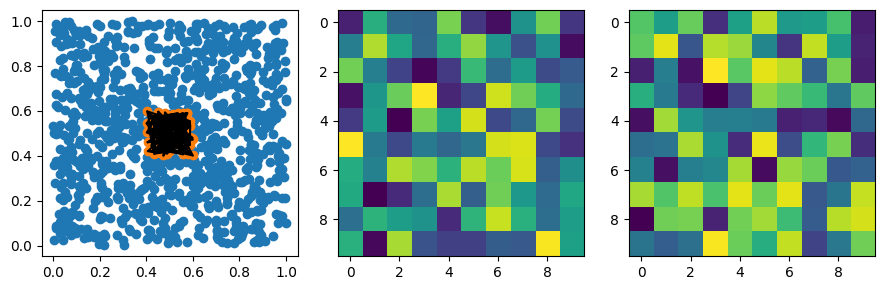

In [4]:
som_plot(x, w)

In [5]:
η0 = 1; # update rate
σ0 = 5; # width
T = 300; # training steps
for t in 1:T
    η = η0 * (1 - t/T); # update rate
    σ = round(Int, σ0 * (1 - t/T)); # decay from large to small

    # loop for the Nin inputs
    for i in 1:Nin
        dist = sum([(x[i, j] .- w[:, :, j]).^2 for j in 1:Din]) # distance between input and neurons
        win_idx = argmin(dist) # winner index
        idx = [max(1,win_idx[j] - σ):min(width_out, win_idx[j] + σ) for j in 1:Din] # neighbor indices
         
        # update the winner & neighbor neuron    
        for j in 1:Din
            w[idx..., j] += η * (x[i, j] .- w[idx..., j]);
        end
    end
end

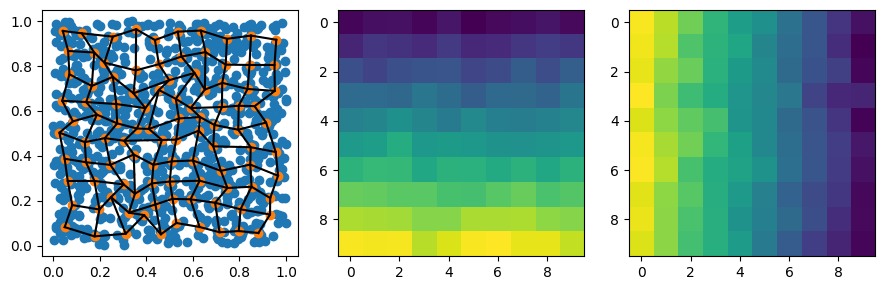

In [6]:
som_plot(x, w)